In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
home_dir = os.path.abspath('..')

In [4]:
stock_file_path = f'{home_dir}\\data\\processed_data\\stock_data'
sentiment_file_path = f'{home_dir}\\data\\processed_data\\sentiment_data'

stock_files = os.listdir(stock_file_path)
sentiment_files = os.listdir(sentiment_file_path)

df_dict = {}

for f in stock_files:
    if f in sentiment_files:
        stock_df = pd.read_csv(f"{stock_file_path}\\{f}")
        sentiment_df = pd.read_csv(f"{sentiment_file_path}\\{f}")

        combined_df = pd.merge(stock_df, sentiment_df, left_on='fdate', right_on='formatted_date', how='outer')

        combined_df['fdate'] = pd.to_datetime(combined_df['fdate'].combine_first(combined_df['formatted_date']))
        combined_df = combined_df.drop(columns=['formatted_date', 'Date'])
        combined_df = combined_df.sort_values(by='fdate')

        df_dict[f"{f.split('.')[0]}"] = combined_df

print(df_dict['AAPL'])



         fdate        Open        High         Low       Close       Volume  \
0   2023-03-22         NaN         NaN         NaN         NaN          NaN   
1   2023-06-01  176.761268  179.168482  175.995331  179.138641   68901800.0   
2   2023-06-02  180.073674  180.819712  178.313020  179.994095   61945900.0   
3   2023-06-05  181.665208  183.972944  177.099444  178.631317  121946500.0   
4   2023-06-06  179.019270  179.168472  176.492680  178.263290   64848400.0   
..         ...         ...         ...         ...         ...          ...   
443 2024-07-22  227.009995  227.779999  223.089996  223.960007   48201800.0   
444 2024-07-23  224.369995  226.940002  222.679993  225.009995   39960300.0   
445 2024-07-24  224.000000  224.800003  217.130005  218.539993   61777600.0   
446 2024-07-25  218.929993  220.850006  214.619995  217.490005   51391200.0   
447 2024-07-26  218.699997  219.490005  216.009995  217.960007   41580100.0   

     Dividends  Stock Splits  articles  sentiment  

In [19]:
apple_relevant_data_clean = df_dict['AAPL'].drop(columns=['Dividends', 'Stock Splits']).dropna()

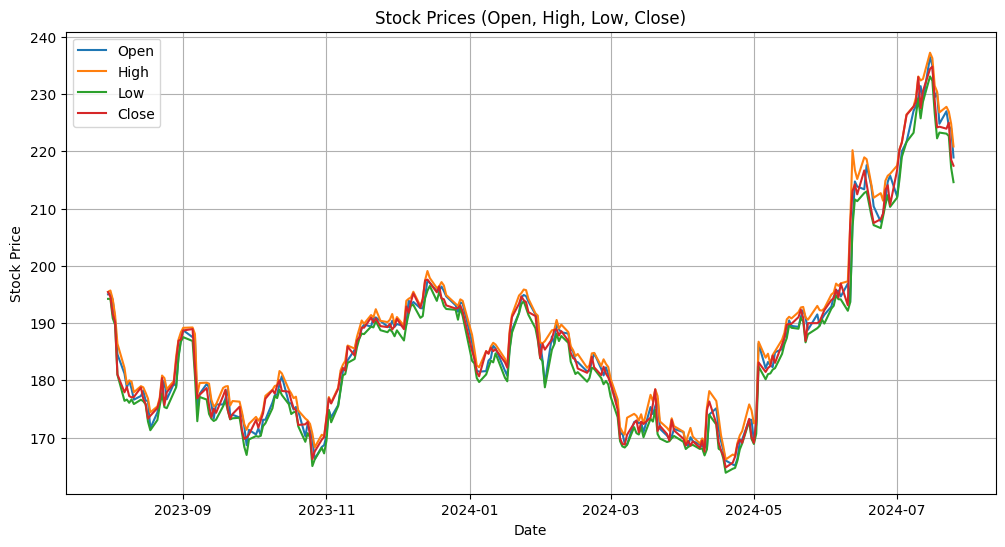

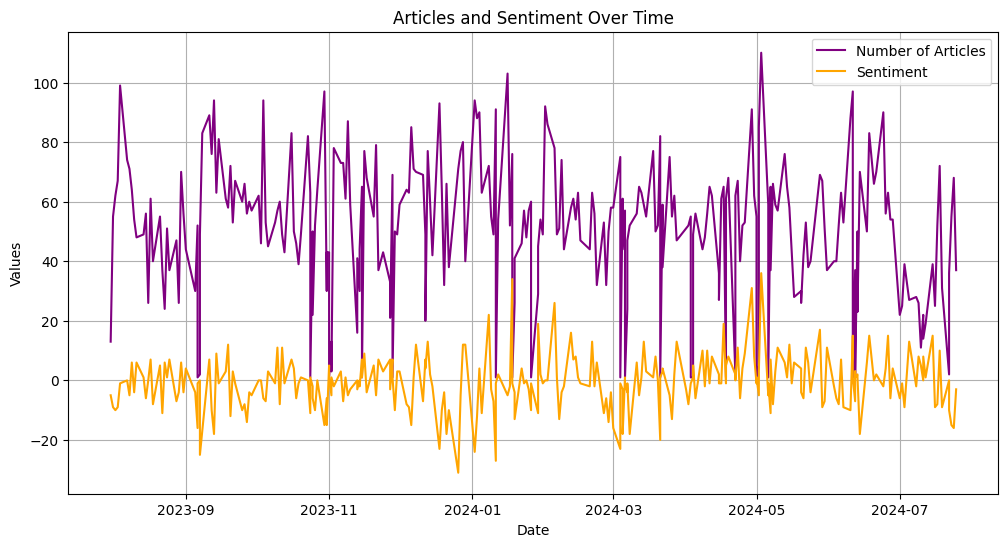

In [20]:
# Ensure the 'Date' column is a datetime object
apple_relevant_data_clean['fdate'] = pd.to_datetime(apple_relevant_data_clean['fdate'])

# Set the 'Date' column as the index for better plotting
apple_relevant_data_clean.set_index('fdate', inplace=True)

# Plot 1: Open, High, Low, Close
plt.figure(figsize=(12, 6))
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['Open'], label='Open')
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['High'], label='High')
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['Low'], label='Low')
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['Close'], label='Close')

plt.title('Stock Prices (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Articles and Sentiment
plt.figure(figsize=(12, 6))
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['articles'], label='Number of Articles', color='purple')
plt.plot(apple_relevant_data_clean.index, apple_relevant_data_clean['sentiment'], label='Sentiment', color='orange')

plt.title('Articles and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
